# TCSS 478/588 In-class Exercise: Logistic regression

These exercises will be used to illustrate how to perform data analyses using R.
Alternatively, you can use R or Rstudio. 
I assume you will learn basic R commands on your own.

Credit: The data and ideas behind these exercises and homeworks are from the NIH LINCS DCIC Crowdsourcing Portal and Ma’ayan Lab @ Mt Sinai, New York.
http://www.maayanlab.net/crowdsourcing/megatask1.php

The overarching goal is to predict adverse drug reactions. But we will take this task step by step. You will learn more about the meanings of these data in future lectures. For illustrative purposes in today’s class, just treat these data as numbers in a matrix.

## 1. Download and read in gene expression data (same as last week)
Download the data “gene_expression_n438x978.txt” from canvas to your computer.  I have removed the first character (#) and an ‘ from the input file to make R happy.

In [1]:
getwd()

[1] "C:/Users/radeshpa/Desktop/BioInformatics/Assignment3"

In [2]:
my.data <- read.table ("ADRs_HLGT_n438x232.txt", sep="\t", header=T)
dimnames(my.data)[[1]] <- my.data[,1]
my.data <- my.data[, -1]
my.data[1:5, 1:6]

,Abdominal.hernias.and.other.abdominal.wall.conditions,Abortions.and.stillbirth,Acid.base.disorders,Administration.site.reactions,Adrenal.gland.disorders,Age.related.factors
ACETAZOLAMIDE,0,0,1,1,0,0
IRBESARTAN,0,0,0,0,1,0
IPRATROPIUM BROMIDE,0,0,0,0,1,0
EFAVIRENZ,0,0,0,0,1,1
THIAMINE,0,0,0,0,0,0


In [3]:
dim (my.data)

[1] 438 978

# 2. Download and read in the adverse drug reaction (0/1) data
Download the dataset "ADRs_HLGT_n438x232.txt" from Canvas to your computer.

In [4]:
adr.mat <- read.table ("ADRs_HLGT_n438x232.txt", sep="\t", header=T)
dimnames(adr.mat)[[1]] <- adr.mat [, 1]
adr.mat <- adr.mat[, -1]
dim (adr.mat)
adr.mat[1:5, 1:6]

[1] 438 232

,Abdominal.hernias.and.other.abdominal.wall.conditions,Abortions.and.stillbirth,Acid.base.disorders,Administration.site.reactions,Adrenal.gland.disorders,Age.related.factors
ACETAZOLAMIDE,0,0,1,1,0,0
IRBESARTAN,0,0,0,0,1,0
IPRATROPIUM BROMIDE,0,0,0,0,1,0
EFAVIRENZ,0,0,0,0,1,1
THIAMINE,0,0,0,0,0,0


## 3. Your task: how would you explore this adr.mat matrix? This is a binary matrix. How sparse is this matrix?

In [5]:
sum (adr.mat)/(438*232)

[1] 0.2674972

In [6]:
# compute the number of ADR (1's) for each side effect
num.one.each.side.effect <- apply (adr.mat, 2, sum)

In [7]:
length (num.one.each.side.effect)

[1] 232

In [11]:
# want to check if there are any side effects with no ADR
# count the number of side effects with a column sum equal to 0
sum (num.one.each.side.effect == 0)
# count the number of side effects with a column sum < 10
sum (num.one.each.side.effect < 10)
# find the index of side effects with a column sum < 10
which (num.one.each.side.effect < 10)

[1] 0

[1] 1

Gastrointestinal.tract.disorders.congenital 
                                         88

In [14]:
# find the indices of the drug with ADR==1 for a given side effect gastrointestinal tract discorders
temp <- which (adr.mat[, 88]==1)
dimnames(adr.mat)[[1]] [temp]

[1] "EFAVIRENZ"          "DOXAZOSIN"          "VIGABATRIN"        
[4] "GLICLAZIDE"         "CLOMIPHENE CITRATE" "MINOCYCLINE"       
[7] "PROGESTERONE"

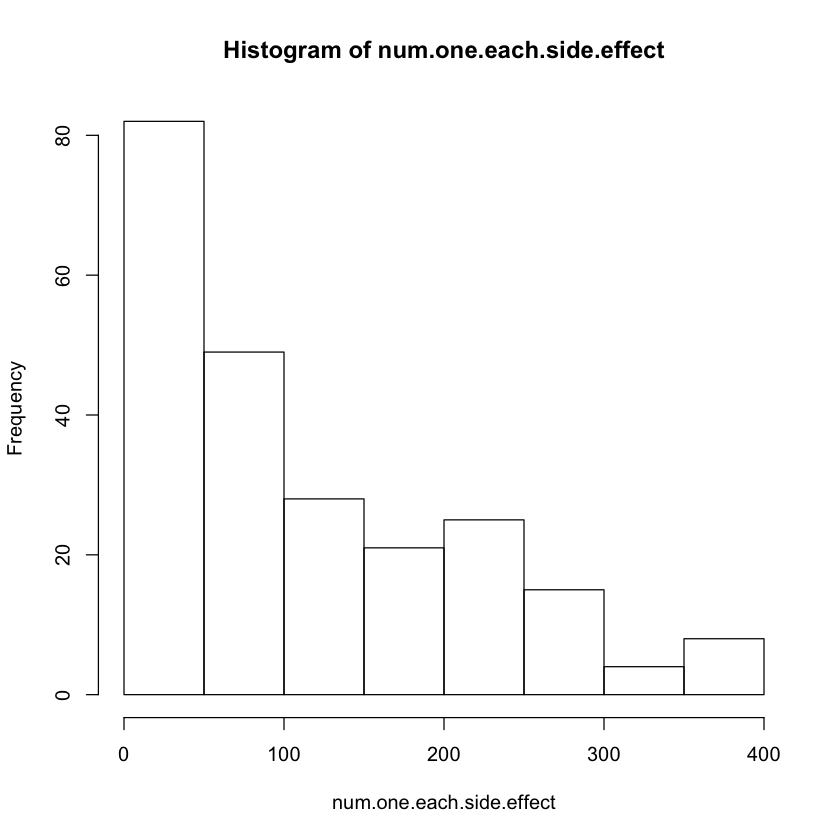

In [9]:
hist (num.one.each.side.effect)

In [15]:
# heart failures is in column 100
num.one.each.side.effect[99:101]

Hearing.disorders               Heart.failures 
                         100                          215 
Hepatobiliary.investigations 
                         196

## 4. Exercise (for home): Exercise: are there any side effects that are not associated with any of the 438 drugs? What is the average number of drugs associated with each side effects?

# 5. Logistic regression

## Is CDK1 predictive of heart failures?

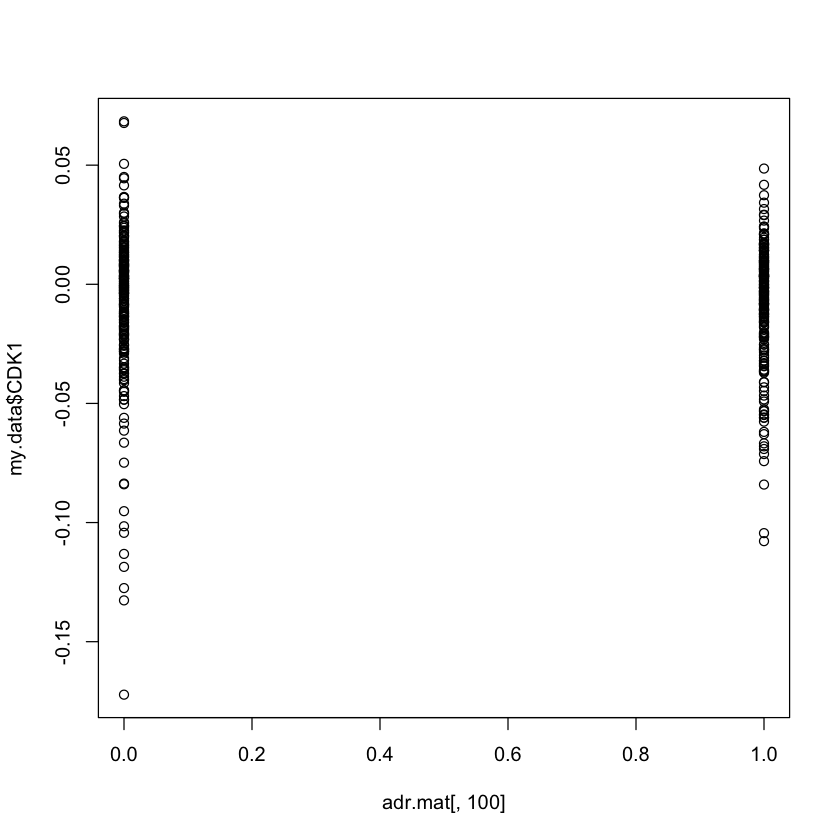

In [16]:
plot (adr.mat[, 100], my.data$CDK1)

In [17]:
glmFit1 <- glm (adr.mat[,100] ~ my.data$CDK1, family=binomial)

In [18]:
summary (glmFit1)


Call:
glm(formula = adr.mat[, 100] ~ my.data$CDK1, family = binomial)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.176  -1.161  -1.157   1.193   1.198  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept)  -0.03821    0.09937  -0.384    0.701
my.data$CDK1 -0.20154    3.27850  -0.061    0.951

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 607.05  on 437  degrees of freedom
Residual deviance: 607.05  on 436  degrees of freedom
AIC: 611.05

Number of Fisher Scoring iterations: 3


In [19]:
help (glm)